In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import warnings
warnings.filterwarnings(action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
datadir = "../input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/"
categories = ["no","yes"]

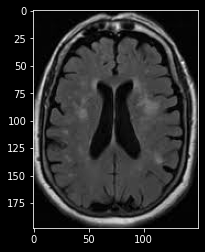

In [3]:
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

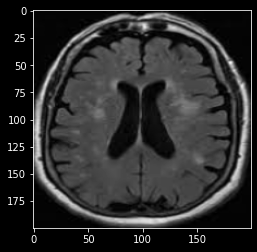

In [4]:
IMG_SIZE = 200
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []
def creat_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
creat_training_data()

In [6]:
print(len(training_data))

253


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
1
1
1


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
y = np.array(y) 
print(X[:1])
len(X)

[array([[ 0,  0,  1, ...,  2,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [ 3,  3,  3, ..., 46, 64, 43],
       [ 3,  3,  3, ...,  0, 48, 16],
       [ 4,  4,  3, ...,  3, 15,  6]], dtype=uint8)]


253

In [10]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(X.shape)

(253, 200, 200, 1)


In [11]:
X = X/255.

In [12]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.08)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.08)

In [13]:
X_train.shape, X_test.shape, X_valid.shape

((213, 200, 200, 1), (21, 200, 200, 1), (19, 200, 200, 1))

In [14]:
from keras import layers, models

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(64, (2,2), activation = "relu", input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (2,2), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(100, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 64)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 307328)            0

In [18]:
model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics  = ["acc"])

In [19]:
checkpoint = keras.callbacks.ModelCheckpoint("Best_1.h5",save_best_only=True)

In [20]:
history = model.fit(X_train,y_train, epochs=10, shuffle=True, validation_data=(X_valid,y_valid),callbacks=[checkpoint])

Epoch 1/10
7/7 [==============================] - 20s 3s/step - loss: 2.2929 - acc: 0.5957 - val_loss: 0.6259 - val_acc: 0.7368
Epoch 2/10
7/7 [==============================] - 19s 3s/step - loss: 0.6603 - acc: 0.6646 - val_loss: 0.6658 - val_acc: 0.5789
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.5915 - acc: 0.7340 - val_loss: 0.6529 - val_acc: 0.6842
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.5396 - acc: 0.7890 - val_loss: 0.5967 - val_acc: 0.6842
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 0.5066 - acc: 0.8098 - val_loss: 0.5684 - val_acc: 0.7368
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 0.4619 - acc: 0.7961 - val_loss: 0.5805 - val_acc: 0.7368
Epoch 7/10
7/7 [==============================] - 18s 2s/step - loss: 0.4579 - acc: 0.8140 - val_loss: 0.5529 - val_acc: 0.7368
Epoch 8/10
7/7 [==============================] - 19s 3s/step - loss: 0.3863 - acc: 0.8393 - val_loss: 0

In [21]:
model1 = models.load_model("Best_1.h5")

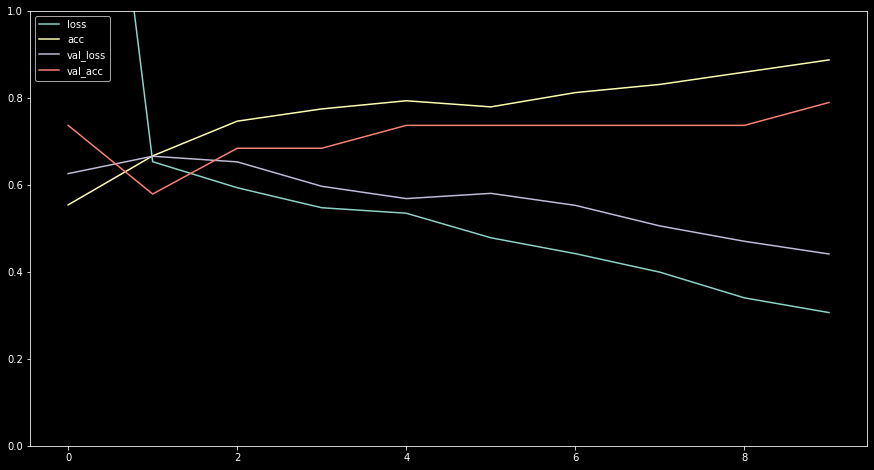

In [22]:
pd.DataFrame(history.history).plot(figsize = (15,8))
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
accuracy = model1.evaluate(X_test,y_test)
accuracy[1]

1/1 [==============================] - 1s 508ms/step - loss: 0.3222 - acc: 0.8571


0.8571428656578064

In [24]:
pred = (model1.predict(X_test) > 0.5).astype("int32")

In [25]:
from sklearn.metrics import confusion_matrix

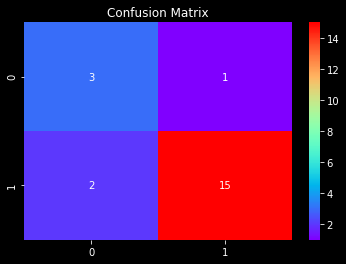

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred), annot = True, cmap = "rainbow")
plt.title("Confusion Matrix")
plt.show()

In [27]:
values = ["No Tumor Detected","Tumor Detected"]

In [28]:
y_t = np.array(y_test)

In [29]:
pred = np.array(pred).reshape(1,-1)

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


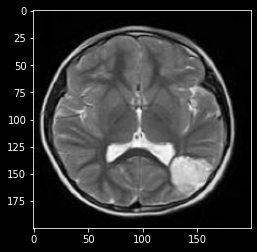

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


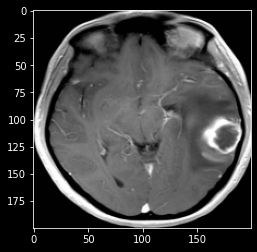

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


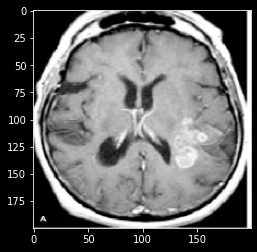

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


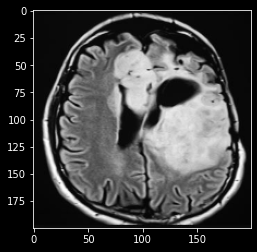

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


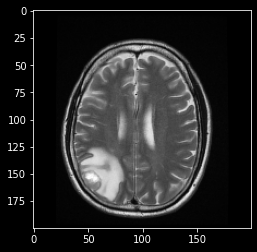

Predicted :- No Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


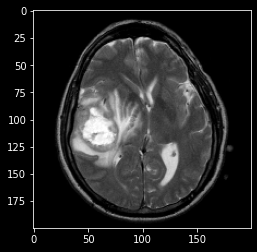

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


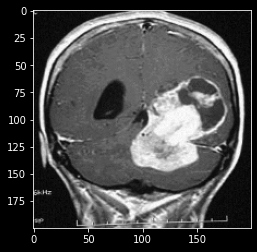

Predicted :- No Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


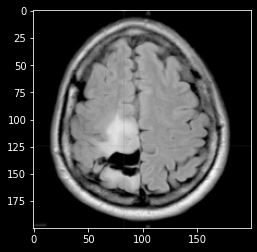

Predicted :- No Tumor Detected with 85.71% accuracy
Actual :- No Tumor Detected


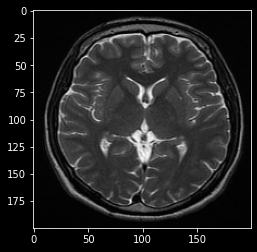

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


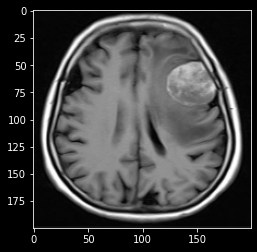

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- No Tumor Detected


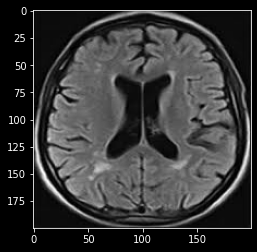

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


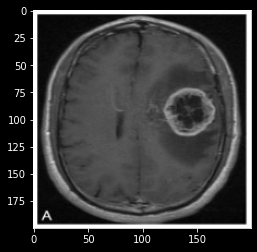

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


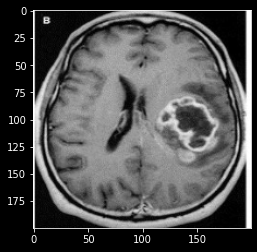

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


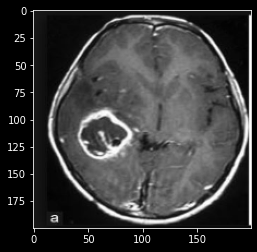

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


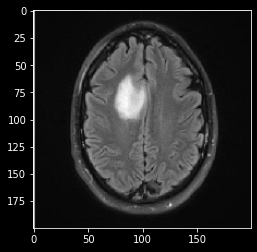

Predicted :- No Tumor Detected with 85.71% accuracy
Actual :- No Tumor Detected


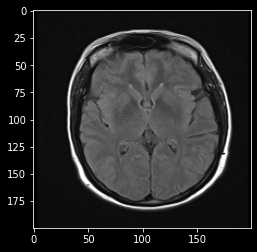

Predicted :- No Tumor Detected with 85.71% accuracy
Actual :- No Tumor Detected


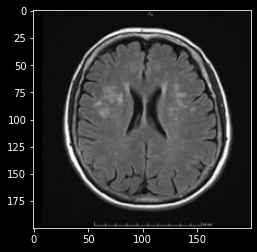

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


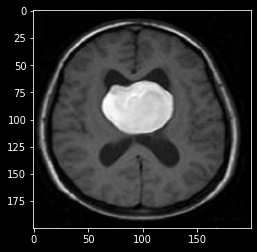

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


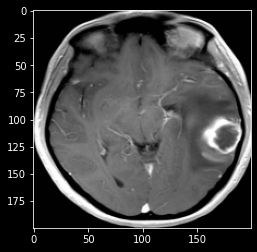

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


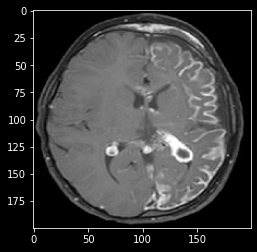

Predicted :- Tumor Detected with 85.71% accuracy
Actual :- Tumor Detected


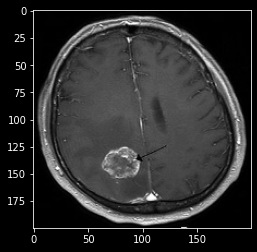

In [30]:
i = 0
for data in X_test:
    print("Predicted :- {} with {}% accuracy".format(values[pred[0][i]],round(accuracy[1]*100,2)))
    print("Actual :- {}".format(values[y_t[i]]))
    plt.imshow(data, cmap="gray")
    plt.show()
    i = i+1